### Perform the simple end to end implementaion of building a simple Artificial Neural Network Model and predict whether the customer will leave the bank or not and even improve the accuracy of the model.

### Steps involved in this Project

1.  Import all the necessary libraries

2.  Load the dataset

3.  Do Exploratory Data Analysis 

4.  Perform the data preprocessing by performing mapping on Gender and OneHotEncoder on Geography column

5. Divide the dataset into independent and dependent variables

6.  Divide the independent and dependent variables into training and testing data

7.  Scale the input data in one range

8.  Compute the class weights to address the imbalance 

9.  Build the improved ANN Model

10.  Compile the Model

11. Add the callbacks as a parameter to the model for improving the accuracy of the model

12.  Train the Model

13. Evaluate the performance of the Model

14. Plot the Accuracy and the loss of the model

15.  Make the prediction, confusion matrix and classification report

16. Test a sample test data for checking whether the customer will leave or stay in the bank

### Step 1: Import all the necessary libraries

In [1520]:
import   numpy               as   np
import   pandas              as   pd
import   matplotlib.pyplot   as   plt
import   seaborn             as   sns

from     sklearn.model_selection     import  train_test_split
from     sklearn.preprocessing       import  StandardScaler, OneHotEncoder
from     sklearn.compose             import  ColumnTransformer
from     sklearn.utils.class_weight  import  compute_class_weight
from     sklearn.metrics             import  accuracy_score, confusion_matrix, classification_report,roc_auc_score


import  tensorflow  as tf
from    tensorflow.keras.models      import Sequential
from    tensorflow.keras.layers      import Dense, Dropout, BatchNormalization
from    tensorflow.keras.callbacks   import EarlyStopping,ReduceLROnPlateau

### OBSERVATIONS:

1.  EarlyStopping,ReduceLROnPlateau    --------->  

     (i)  EarlyStopping,ReduceLROnPlateau are the Keras callbacks that is used to improve the performance of the model, reduces the overfitting and thus saves the training time.


2.  EarlyStopping ----------------->

     (i)  It is the keras callbacks that is used to completely stop the training when it sees that there is no improvement in the performance of the model.

     (ii) It is needed to prevent the overfitting and to prevent the unnecessary training loss.


3.  ReduceLROnPlateau --------------->

    (i)  It is the keras callbacks that is used to reduce the learning rate when there is no improvement in the performance of the model.

    (ii) It is needed so that the model will not stop and it will learn more accurately.



### Step 2: Load the dataset

In [1521]:
df = pd.read_csv('Customer_Churn_Modelling.csv')

In [1522]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### OBSERVATIONS:

1. The above dataset depicts about the list of all the customers whether they are leaving the bank or not.

2. Inputs are the details of the customer i.e from RowNumber .... EstimatedSalary

3. Output is Exited. It specifies that the Customer will exit the bank or not.

### Step 3: Do Exploratory Data Analysis 

In [1523]:
### Get the total length of the dataset

print("Total length of the dataset is:", len(df))

Total length of the dataset is: 10000


In [1524]:
### Get the shape of the dataset

df.shape

(10000, 14)

In [1525]:
### Get the first five rows of the dataset

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1526]:
### Get the last five rows of the dataset

df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [1527]:
### Get the columns used in the dataset

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [1528]:
### Get the information about the columns used in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [1529]:
### Get the statistical summary about the dataset

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Step 4: Perform the data preprocessing by performing mapping on Gender and OneHotEncoder on Geography column

In [1530]:
### Remove all the irrelevant columns from the dataset

df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1,inplace=True)

In [1531]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [1532]:
### Perform One Hot Encoding on 'Geography' column

from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

### transform the input

df['Geography'] = lab.fit_transform(df['Geography'])

In [1533]:
### Perform One Hot Encoding on 'Gender' column

from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

### transform the input

df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})

In [1534]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


### Step 5: Divide the dataset into independent and dependent variables

In [1535]:
X = df.drop(columns=['Exited'],axis=1)   ### indepndent variable

Y = df['Exited']                         ### dependent variable

In [1536]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [1537]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Step 6: Divide the independent and dependent variables into training and testing data

In [1538]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [1539]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,1,32,6,0.00,2,1,1,179093.26
1561,632,1,1,42,4,119624.60,2,1,1,195978.86
1670,559,2,1,24,3,114739.92,1,1,0,85891.02
6087,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,517,0,1,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,682,0,0,58,1,0.00,1,1,1,706.50
5390,735,0,0,38,1,0.00,3,0,0,92220.12
860,667,0,1,43,8,190227.46,1,1,0,97508.04


In [1540]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,1,43,1,0.00,2,1,1,146379.30
1731,601,2,0,44,4,0.00,2,1,0,58561.31
4742,506,1,1,59,8,119152.10,2,1,1,170679.74
4521,560,2,0,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...
6412,602,1,0,53,5,98268.84,1,0,1,45038.29
8285,609,0,1,25,10,0.00,1,0,1,109895.16
7853,730,0,0,47,7,0.00,1,1,0,33373.26
1095,692,0,1,29,4,0.00,1,1,0,76755.99


In [1541]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (8000, 10)
Shape of the input testing  data is: (2000, 10)


In [1542]:
Y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [1543]:
Y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [1544]:
print("Shape of the output training data is:", Y_train.shape)
print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (8000,)
Shape of the output testing  data is: (2000,)


### Step 7: Scale the input data in one range

In [1545]:
from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled = sc.transform(X_test)

In [1546]:
X_train_scaled

array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]], shape=(8000, 10))

In [1547]:
X_test_scaled

array([[-0.57749609,  0.30164867,  0.91324755, ..., -1.54035103,
        -1.02583358, -1.01960511],
       [-0.29729735, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  0.79888291],
       [-0.52560743,  1.50884694, -1.09499335, ...,  0.64920267,
        -1.02583358, -0.72797953],
       ...,
       [ 0.81311987, -0.9055496 , -1.09499335, ...,  0.64920267,
        -1.02583358, -1.16591585],
       [ 0.41876609, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.41163463],
       [-0.24540869,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  0.12593183]], shape=(2000, 10))

### OBSERVATIONS:

1.  All the inputs are in one range from 0 to 1.

### Step 8: Compute the class weights to address the imbalance 

In [1548]:
### To address the imbalance, we are computing the weights of all the unique classes

classes = np.unique(Y_train)

print(classes) ### unique classes


### Compute the weights of all the unique classes

class_weights_values=compute_class_weight(
    classes = classes            ,
    class_weight  = 'balanced'   ,
    y = Y_train
)


print(class_weights_values)


### create the dictionary that mapes the weight to every class

class_weight_ans = {int(c):w for c,w in zip(classes, class_weights_values)}

print(class_weight_ans)

[0 1]
[0.62932662 2.43309002]
{0: np.float64(0.6293266205160478), 1: np.float64(2.4330900243309004)}


### Step 9: Build the improved ANN Model

In [1549]:
X_train.shape[1]

10

In [1550]:
### Create an onject for ANN Model

model = Sequential([
    ### Create the first dense neural network layer
    Dense(64, activation='relu', input_dim=X_train.shape[1])           ,
    ### Perform Batch Normalization
    BatchNormalization()                                               ,
    ### Perform Dropout on the dense layer to reduce overfitting
    Dropout(0.25)                                                      ,

    ### Create the second dense neural network layer
    Dense(32, activation = 'relu')                                     ,
    ### Perform BatchNormalization
    BatchNormalization()                                               ,
    ### Perform Droput on the dense layer to reduce overfitting
    Dropout(0.15)                                                      ,

    ### Create the third dense neural network layer 
    Dense(16, activation='relu')                                       ,


    ### Create the output layer
    Dense(1, activation='sigmoid') 
])

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### OBSERVATIONS:

1.  The Artificial Neural Network (ANN) is built using the Sequential model, which stacks layers linearly—one after another.

2.  The first hidden layer consists of 64 neurons with a ReLU activation function, which introduces non-linearity and helps the network learn complex patterns.

3.  Batch Normalization is applied after the first layer to stabilize the training process and accelerate convergence. It is used to normalize the activation of the layer during the training and improve the performance of the model, brinf the stability and make it more faster.

4.  The second hidden layer contains 32 neurons with a ReLU activation function, enabling the model to capture deeper relationships in the data.

5.  The third hidden layer consists of 16 neurons with a ReLU activation function, further refining the learned representations.

6.  Finally, the output layer includes one neuron with a sigmoid activation function, producing a probability output suitable for binary classification tasks.

### Step 10: Compile the Model

In [1551]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(
    optimizer = optimizer                    ,
    loss      = 'binary_crossentropy'        ,
    metrics   = ['accuracy']
)

### OBSERVATIONS:

1. The ANN Model has been made ready for training with the help of following parameters:-

    (a.)   optimizer = 'Adam' 

            ---> 'Adam' is the most powerful optimizer that is used to update the weights during backpropagation.

            ---> It comprises of 'Momentum' that smoothens the convergence speed.

            ---> It even comprises of 'RMSProp' that adjusts the learning rate to get more faster and stable training.

    (b.) loss = 'binary_crossentropy'

            ---> Here the loss function is binary_crossentropy as it is used to solve binary classification problem.

    (c.) metrics = 'accuracy'

           ----> It is used to evaluate the performance of the model.

In [1552]:
### get the summary of the model

model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)               │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 192 (768.00 B)

### Step 11:  Add the callbacks as a parameter to the model for improving the accuracy of the model

In [1553]:
er = EarlyStopping(
    monitor               =          'val_loss'                      ,
    patience              =             8                            ,
    restore_best_weights  =            True
)


rlr = ReduceLROnPlateau(
    monitor               =         'val_loss'                       ,
    factor                =           0.5                            ,
    patience              =            4                             ,
    verbose               =            1
)

### CallBacks

These are the special parameters of keras that is used to monitor the performance of the model during earlystopping and adjusting the learning rate.

### Types of Callbacks:-

1.  EarlyStopping --->

It is a condition used in keras that is used to stop the training of thge model early if it sees that there is no improvement in the performance of the model.


2.  ReduceLROnPlateau ------>

It is used to adjust the learning rate so as to improve the model training instead of stopping it. Thus it increases the performance of the model.

### Step 12: Train the Model

In [1554]:
history = model.fit(
    X_train_scaled                                          ,
    Y_train                                                 ,
    epochs            =   100                               ,
    validation_split  =   0.15                              ,
    batch_size        =   64                                ,
    class_weight      =  class_weight_ans                   ,
    callbacks         =  [er, rlr]                          ,
    verbose           =  2
)

Epoch 1/100
107/107 - 2s - 15ms/step - accuracy: 0.6040 - loss: 0.6617 - val_accuracy: 0.7392 - val_loss: 0.5893 - learning_rate: 1.0000e-03
Epoch 2/100
107/107 - 0s - 2ms/step - accuracy: 0.6697 - loss: 0.5932 - val_accuracy: 0.7600 - val_loss: 0.5379 - learning_rate: 1.0000e-03
Epoch 3/100
107/107 - 0s - 2ms/step - accuracy: 0.7051 - loss: 0.5655 - val_accuracy: 0.7558 - val_loss: 0.5120 - learning_rate: 1.0000e-03
Epoch 4/100
107/107 - 0s - 3ms/step - accuracy: 0.7147 - loss: 0.5444 - val_accuracy: 0.7625 - val_loss: 0.4898 - learning_rate: 1.0000e-03
Epoch 5/100
107/107 - 0s - 3ms/step - accuracy: 0.7262 - loss: 0.5301 - val_accuracy: 0.7725 - val_loss: 0.4816 - learning_rate: 1.0000e-03
Epoch 6/100
107/107 - 0s - 3ms/step - accuracy: 0.7432 - loss: 0.5126 - val_accuracy: 0.7750 - val_loss: 0.4773 - learning_rate: 1.0000e-03
Epoch 7/100
107/107 - 0s - 3ms/step - accuracy: 0.7471 - loss: 0.5058 - val_accuracy: 0.7817 - val_loss: 0.4694 - learning_rate: 1.0000e-03
Epoch 8/100
107/107

### OBSERVATIONS:

1. The model is trained with the help of the training data 

    Parameters :

    Training data (Input)   :  X_train_scaled    ,

    Training data (Output)  :  Y_train_scaled    ,

    epochs=100              : 100 iterations are used to train the model   ,

    batch_size = 64         : weights get updated after every 64 samples   ,
 
    validation_split = 0.15 : 15 % of the data is meant for validation     ,

    class_weight = class_weight : assigns the weights to every class       ,

    callbacks = [er,rlr]  : monitors the performance of model and adjusts learning rate

    verbose : prints the model information during training


After model training we have observed that the accuracy of the model has improved a lot and the loss function has reduced.

### Step 13: Evaluate the performance of the Model

In [1555]:
train_loss, train_acc = model.evaluate(X_train_scaled, Y_train, verbose = 0)

test_loss,  test_acc =  model.evaluate(X_test_scaled, Y_test, verbose = 0)

In [1556]:
print(f"\nTrain loss: {train_loss:.4f}, Train acc: {train_acc:.4f}")
print(f" Test loss: {test_loss:.4f},  Test acc: {test_acc:.4f}")



Train loss: 0.4298, Train acc: 0.8035
 Test loss: 0.4481,  Test acc: 0.7925


### OBSERVATIONS:

1. The accuracy of both the training and the testing data is very high.

2. The loss of both the training and testing data is very low.

So the model is trained very well.

### Step 14: Plot the Accuracy and the loss of the model

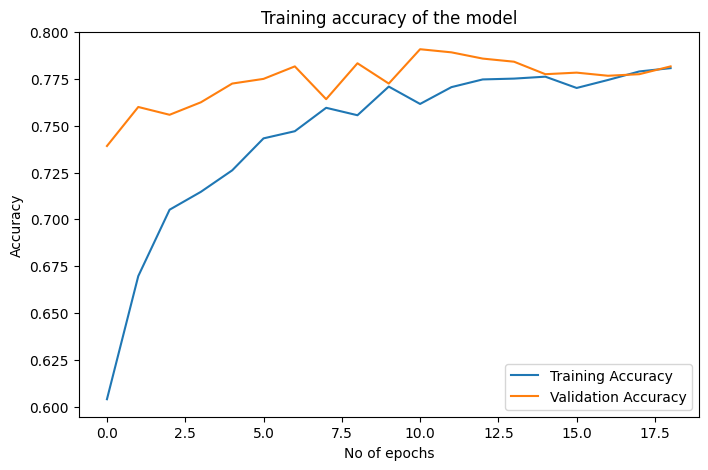

In [1557]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training accuracy of the model')
plt.xlabel('No of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### OBSERVATIONS:

1. From the above graph, it is clear that with the increase in the number of epochs, both the training accuracy of the model increases.

2. But the Validation accuracy of the model remains constant.

### Step 15: Make the prediction, confusion matrix and classification report

In [1558]:
Y_pred = model.predict(X_test_scaled).ravel()


Y_pred = (Y_pred >= 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [1559]:
Y_pred

array([0, 0, 0, ..., 1, 0, 1], shape=(2000,))

In [1560]:
print("\nAccuracy  of the model is:\n", accuracy_score(Y_test,Y_pred))
print("\nROC Score of the model is:\n", roc_auc_score(Y_test,Y_pred))
print("\nConfusion matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification report:\n", classification_report(Y_test, Y_pred, digits=4))


Accuracy  of the model is:
 0.7925

ROC Score of the model is:
 0.7689980698312567

Confusion matrix:
 [[1298  309]
 [ 106  287]]

Classification report:
               precision    recall  f1-score   support

           0     0.9245    0.8077    0.8622      1607
           1     0.4815    0.7303    0.5804       393

    accuracy                         0.7925      2000
   macro avg     0.7030    0.7690    0.7213      2000
weighted avg     0.8375    0.7925    0.8068      2000



### Step 16:  Test a sample test data for checking whether the customer will leave or stay in the bank

In [1561]:
import pandas as pd
import numpy as np

# -------------------------------
# 1. Create sample customer input
# -------------------------------
sample = {
    'CreditScore': 650,
    'Age': 40,
    'Tenure': 3,
    'Balance': 60000.0,
    'NumOfProducts': 1,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 50000.0,
    'Geography': 'France',
    'Gender': 'Male'
}

sample_df = pd.DataFrame([sample])
print("Original Sample Input:\n", sample_df)

# -------------------------------
# 2. Encode Gender
# -------------------------------
sample_df['Gender'] = sample_df['Gender'].map({'Female': 0, 'Male': 1}).astype(int)

# -------------------------------
# 3. One-hot encode Geography
#    (same logic as training)
# -------------------------------
sample_df = pd.get_dummies(sample_df, columns=['Geography'], drop_first=True)

# -------------------------------
# 4. Ensure all training columns exist
# -------------------------------
for col in X_train.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0

# -------------------------------
# 5. Reorder columns exactly
# -------------------------------
sample_df = sample_df[X_train.columns]

print("\nProcessed Sample Input:\n", sample_df)

# -------------------------------
# 6. Apply scaling
# -------------------------------
sample_scaled = sc.transform(sample_df)

# -------------------------------
# 7. Predict churn
# -------------------------------
y_prob = model.predict(sample_scaled)[0][0]
y_pred = int(y_prob >= 0.5)

# -------------------------------
# 8. Output result
# -------------------------------
print(f"\nPredicted Probability of Churn: {y_prob:.4f}")

if y_pred == 1:
    print("Prediction: Customer will LEAVE the bank ❌")
else:
    print("Prediction: Customer will STAY in the bank ✅")


Original Sample Input:
    CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          650   40       3  60000.0              1          1   

   IsActiveMember  EstimatedSalary Geography Gender  
0               1          50000.0    France   Male  

Processed Sample Input:
    CreditScore  Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          650          0       1   40       3  60000.0              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1          50000.0  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Predicted Probability of Churn: 0.2897
Prediction: Customer will STAY in the bank ✅
